<a href="https://colab.research.google.com/github/Sedowlas/EDA/blob/main/Products(EDA%2CPANDAS%2CSQL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка данных

https://drive.google.com/file/d/1FfCH-ycqPbyziHDWki5YXrKI7oshsfVg/view?usp=sharing

In [ ]:
!gdown 1FfCH-ycqPbyziHDWki5YXrKI7oshsfVg

Downloading...
From: https://drive.google.com/uc?id=1FfCH-ycqPbyziHDWki5YXrKI7oshsfVg
To: /content/BigBasket Products.csv.zip
100% 6.34M/6.34M [00:00<00:00, 69.9MB/s]


#Предобработка

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import sqlite3 

In [ ]:
df = pd.read_csv('/content/BigBasket Products.csv.zip')

In [ ]:
con = sqlite3.connect('db')

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df.isna().mean()

product         0.000036
category        0.000000
sub_category    0.000000
brand           0.000036
sale_price      0.000000
market_price    0.000000
type            0.000000
rating          0.313047
description     0.004173
dtype: float64

In [ ]:
df.to_sql('product',con,index=False,if_exists='replace')

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
pd.set_option('display.max_rows', 1407)

#Анализ

In [ ]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df.groupby(['category'])[['sale_price']].agg(['count','mean'])

sale_price            
                              count        mean
category                                       
Baby Care                       610  534.946180
Bakery, Cakes & Dairy           851  142.802750
Beauty & Hygiene               7867  418.679197
Beverages                       885  239.758949
Cleaning & Household           2675  226.173118
Eggs, Meat & Fish               350  288.897486
Foodgrains, Oil & Masala       2676  193.167500
Fruits & Vegetables             557   50.889336
Gourmet & World Food           4690  319.854011
Kitchen, Garden & Pets         3580  507.524615
Snacks & Branded Foods         2814  129.593134

Узнали какая категория продуктов продалась больше и какая принесла больше всего прибыли. На таблице мы видим что больше всего прибыли принесла категория Baby Care, а продаж больше в категории Beauty & Hygiene, следовательно можно сделать вывод что с соответствием с продажами больше всего выручки принесла категория Beauty & Hygiene!  
Для наглядного примера посмотрим на график.

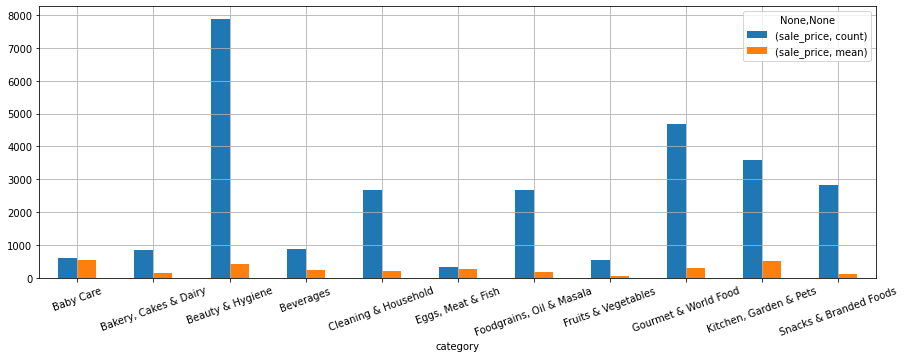

In [ ]:
df.groupby(['category'])[['sale_price']].agg(['count','mean']).plot(rot=20,ylim=0,grid=True,kind='bar',figsize=(15,5))

In [ ]:
df.groupby(['category'])[['market_price']].agg(['count','mean'])

market_price            
                                count        mean
category                                         
Baby Care                         610  596.754098
Bakery, Cakes & Dairy             851  157.881316
Beauty & Hygiene                 7867  493.535302
Beverages                         885  272.233898
Cleaning & Household             2675  262.112280
Eggs, Meat & Fish                 350  325.835486
Foodgrains, Oil & Masala         2676  230.131913
Fruits & Vegetables               557   64.433662
Gourmet & World Food             4690  358.420885
Kitchen, Garden & Pets           3580  659.657654
Snacks & Branded Foods           2814  140.775231

Здесь мы узнали какая рыночная цена и поняли, если бы магазин продавал по рыночной цене, то выручка у него была бы больше, а в особенности в категории Kitchen, Garden & Pets!  
Для наглядности посмотрим на график.

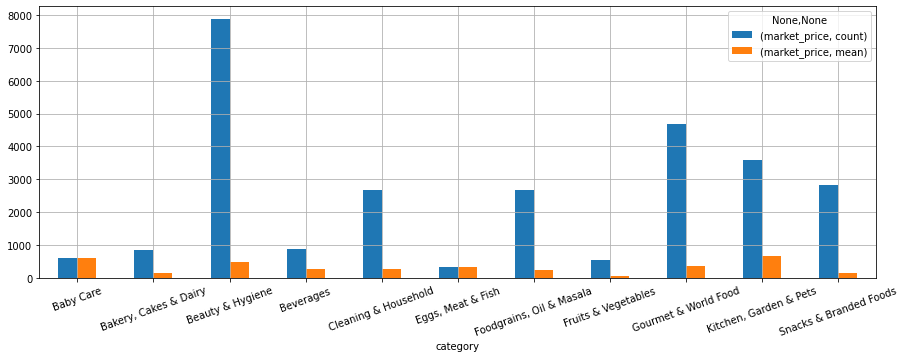

In [ ]:
df.groupby(['category'])[['market_price']].agg(['count','mean']).plot(rot=20,ylim=0,grid=True,kind='bar',figsize=(15,5))

In [ ]:
df.groupby(['sub_category'])[['sale_price']].agg(['count','mean'])

sale_price             
                                 count         mean
sub_category                                       
All Purpose Cleaners               475   271.590611
Appliances & Electricals           138   256.474275
Atta, Flours & Sooji               152   149.826579
Baby Accessories                    37   409.648649
Baby Bath & Hygiene                206   419.088689
Baby Food & Formula                 48   358.315625
Bakery Snacks                       39   126.793077
Bakeware                            48   214.666667
Bath & Hand Wash                   996   229.827309
Bins & Bathroom Ware               392   272.686480
Biscuits & Cookies                 305    65.289410
Breads & Buns                       48    75.994583
Breakfast Cereals                  254   274.387441
Cakes & Pastries                   125   146.338000
Car & Shoe Care                     48   198.100417
Cereals & Breakfast                204   348.703627
Chocolates & Biscuits              609   269.818177
Chocolates & Candies               274   132.914197
Coffee                              90   207.982667
Cookies, Rusk & Khari              153   132.859542
Cooking & Baking Needs             693   253.588167
Cookware & Non Stick               354  1204.869774
Crockery & Cutlery                 890   522.791011
Cuts & Sprouts                      96    37.063021
Dairy                              385   149.439169
Dairy & Cheese                     253   341.322134
Dals & Pulses                      192   138.282448
Detergents & Dishwash              261   269.750536
Diapers & Wipes                    247   741.909960
Disposables, Garbage Bag           165   210.463939
Drinks & Beverages                 736   371.981345
Dry Fruits                         203   255.474877
Edible Oils & Ghee                 248   540.908710
Eggs                                34   129.530882
Energy & Soft Drinks               111   150.441982
Exotic Fruits & Veggies             70    60.250429
Feeding & Nursing                   48   268.583333
Feminine Hygiene                   285   316.741053
Fish & Seafood                     132   277.220985
Flask & Casserole                   48   505.729167
Flower Bouquets, Bunches             8    83.250000
Fragrances & Deos                 1000   893.099590
Fresh Fruits                       124    95.398468
Fresh Vegetables                   168    30.773452
Fresheners & Repellents            276   220.224891
Frozen Veggies & Snacks            183   179.450055
Fruit Juices & Drinks              233   180.671931
Gardening                           48   290.125000
Gourmet Breads                      35   107.455714
Hair Care                         1028   383.546449
Health & Medicine                 1133   365.696487
Health Drink, Supplement           100   419.408400
Herbs & Seasonings                  24    31.080417
Ice Creams & Desserts               48   170.054167
Indian Mithai                       64   256.468750
Kitchen Accessories                330   245.423848
Makeup                              48   329.423750
Marinades                            1   225.000000
Masalas & Spices                   889    90.488481
Men's Grooming                     805   322.867404
Mops, Brushes & Scrubs             348   264.373017
Mothers & Maternity                 31   443.419032
Mutton & Lamb                       20   716.005000
Non Dairy                           32   224.650000
Noodle, Pasta, Vermicelli          122    71.822623
Oils & Vinegar                     239   952.411297
Oral Care                          271   182.256827
Organic Fruits & Vegetables         68    34.654412
Organic Staples                    656   164.730762
Party & Festive Needs               48   143.812500
Pasta, Soup & Noodles              251   218.343187
Pet Food & Accessories             356   857.348034
Pickles & Chutney                  162   124.969815
Pooja Needs                        252   136.771984
Pork & Other Meats      

Топ - 3 самых прибыльных подкатегорий:

1.Cookware & Non Stick - 1204.869774  
2.Oils & Vinegar - 952.411297  
3.Fragrances & Deos	- 893.099590

In [ ]:
df.groupby(['category','sub_category'])[['sale_price']].agg(['count','mean'])

sale_price             
                                                          count         mean
category                 sub_category                                       
Baby Care                Atta, Flours & Sooji                 1   300.000000
                         Baby Accessories                    37   409.648649
                         Baby Bath & Hygiene                206   419.088689
                         Baby Food & Formula                 47   361.152128
                         Diapers & Wipes                    247   741.909960
                         Feeding & Nursing                   48   268.583333
                         Mothers & Maternity                 24   475.416250
Bakery, Cakes & Dairy    Bakery Snacks                       25   104.448400
                         Breads & Buns                       48    75.994583
                         Cakes & Pastries                   125   146.338000
                         Cookies, Rusk & Khari              153   132.859542
                         Dairy                              385   149.439169
                         Gourmet Breads                      35   107.455714
                         Ice Creams & Desserts               48   170.054167
                         Non Dairy                           32   224.650000
Beauty & Hygiene         Bath & Hand Wash                   996   229.827309
                         Feminine Hygiene                   285   316.741053
                         Fragrances & Deos                 1000   893.099590
                         Hair Care                         1028   383.546449
                         Health & Medicine                 1133   365.696487
                         Makeup                              48   329.423750
                         Men's Grooming                     805   322.867404
                         Mothers & Maternity                  7   333.714286
                         Oral Care                          271   182.256827
                         Skin Care                         2294   412.119608
Beverages                Coffee                              90   207.982667
                         Energy & Soft Drinks               111   150.441982
                         Fruit Juices & Drinks              233   180.671931
                         Health Drink, Supplement           100   419.408400
                         Tea                                334   269.842874
                         Water                               17   153.191176
Cleaning & Household     All Purpose Cleaners               475   271.590611
                         Bins & Bathroom Ware               392   272.686480
                         Car & Shoe Care                     48   198.100417
                         Detergents & Dishwash              261   269.750536
                         Disposables, Garbage Bag           165   210.463939
                         Fresheners & Repellents            276   220.224891
                         Mops, Brushes & Scrubs             348   264.373017
                         Party & Festive Needs               48   143.812500
                         Pooja Needs                        252   136.771984
                         Stationery                         410   147.123829
Eggs, Meat & Fish        Eggs                                34   129.530882
                         Fish & Seafood                     132   277.220985
                         Marinades                            1   225.000000
                         Mutton & Lamb                       19   721.110526
                         Pork & Other Meats                   5   263.000000
                         Sausages, Bacon & Salami           159   282.237736
Foodgrains, Oil & Masala Atta, Flours & Sooji               138   142.359710
                         Baby Food & Formula                  1   225.000000
                         Dals & Pulses           

Посмотрим в каких категориях находятся те самые прибыльные подкатегории:

1.Kitchen, Garden & Pets - Cookware & Non Stick  
2.Gourmet & World Food - Oils & Vinegar  
3.Beauty & Hygiene - Fragrances & Deos

In [ ]:
df.groupby(['category','sub_category'])[['market_price']].agg(['count','mean'])

market_price             
                                                            count         mean
category                 sub_category                                         
Baby Care                Atta, Flours & Sooji                   1   300.000000
                         Baby Accessories                      37   409.648649
                         Baby Bath & Hygiene                  206   433.451456
                         Baby Food & Formula                   47   362.744681
                         Diapers & Wipes                      247   881.603239
                         Feeding & Nursing                     48   268.583333
                         Mothers & Maternity                   24   482.291667
Bakery, Cakes & Dairy    Bakery Snacks                         25   115.960000
                         Breads & Buns                         48    79.166667
                         Cakes & Pastries                     125   154.416000
                         Cookies, Rusk & Khari                153   150.326797
                         Dairy                                385   167.485714
                         Gourmet Breads                        35   107.657143
                         Ice Creams & Desserts                 48   178.145833
                         Non Dairy                             32   267.343750
Beauty & Hygiene         Bath & Hand Wash                     996   258.277470
                         Feminine Hygiene                     285   370.624561
                         Fragrances & Deos                   1000  1136.047000
                         Hair Care                           1028   430.699416
                         Health & Medicine                   1133   382.766858
                         Makeup                                48   455.333542
                         Men's Grooming                       805   395.787578
                         Mothers & Maternity                    7   435.428571
                         Oral Care                            271   206.826568
                         Skin Care                           2294   482.879686
Beverages                Coffee                                90   220.855556
                         Energy & Soft Drinks                 111   160.729730
                         Fruit Juices & Drinks                233   200.103004
                         Health Drink, Supplement             100   444.400000
                         Tea                                  334   327.829341
                         Water                                 17   155.882353
Cleaning & Household     All Purpose Cleaners                 475   293.566316
                         Bins & Bathroom Ware                 392   332.538520
                         Car & Shoe Care                       48   208.020833
                         Detergents & Dishwash                261   312.685824
                         Disposables, Garbage Bag             165   221.660606
                         Fresheners & Repellents              276   234.728261
                         Mops, Brushes & Scrubs               348   319.324713
                         Party & Festive Needs                 48   162.078125
                         Pooja Needs                          252   198.837302
                         Stationery                           410   169.230488
Eggs, Meat & Fish        Eggs                                  34   136.000000
                         Fish & Seafood                       132   315.392045
                         Marinades                              1   225.000000
                         Mutton & Lamb                         19   911.736842
                         Pork & Other Meats                     5   263.000000
                         Sausages, Bacon & Salami             159   307.696038
Foodgrains, Oil & Masala Atta, Flours & Sooji                 138   176.000000
                        

Посмотрим в каких категориях находятся самые прибыльные подкатегории рыночной цены:

1.Kitchen, Garden & Pets - Cookware & Non Stick  
2.Gourmet & World Food - Oils & Vinegar  
3.Beauty & Hygiene - Fragrances & Deos

In [ ]:
df.groupby(['brand'],dropna=False)[['sale_price']].agg(['count','mean'])

sale_price            
                  count        mean
brand                              
&Me                   3  248.333333
&Stirred             10  157.000000
109°F                 1   99.000000
137 Degree            1  445.000000
18 Herbs             30  263.333333
...                 ...         ...
marshmallow           2  150.000000
moha                  4  183.000000
mother dairy         13  186.503846
sumeru               18  203.261111
NaN                   1   50.000000

[2314 rows x 2 columns]

Воспользуемся SQL для быстрой отфильтровки так как тут много строк и вручную не хочется искать самый дорогой бренд!

In [ ]:
sql = '''select t.brand, t.sale_price, t.market_price from product t
order by t.sale_price desc
'''

In [ ]:
select(sql)

,brand,sale_price,market_price
0,Wahl,12500.00,12500.0
1,Farmina,10090.00,10090.0
2,Braun,8184.44,10769.0
3,Prestige,7999.00,12245.0
4,Abbies,7299.00,7299.0
...,...,...,...
27550,Nestle,5.00,5.0
27551,Winkies,5.00,5.0
27552,Britannia,5.00,5.0
27553,Livon,3.00,3.0


С помощью SQL быстро узнали какой бренд самый дорогой 

In [ ]:
sql = '''select * from product t 
where t.brand = 'Wahl'
'''

In [ ]:
select(sql)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Quick Style Lithium Cordless Trimmer For Men -...,Beauty & Hygiene,Men's Grooming,Wahl,1095.0,1095.0,Moustache & Beard Care,3.8,Grooming is a part of your style. Getting the ...
1,Clean & Confident Cordless Trimmer For Women -...,Beauty & Hygiene,Feminine Hygiene,Wahl,895.0,895.0,Hair Removal,3.5,Add the Wahl Clean and Confident to your groom...
2,Flea & Tick Shampoo,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,350.0,350.0,Pet Cleaning & Grooming,NaN,This is a Vegetarian product. Rosemary and Min...
3,Oatmeal Shampoo,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,850.0,850.0,Pet Cleaning & Grooming,NaN,"Wahls oatmeal shampoo contains oatmeal, coconu..."
4,Pet Ear Cleaner,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,500.0,500.0,Pet Cleaning & Grooming,NaN,Pet Ear Cleaner from Wahl naturally cools as i...
5,Puppy Shampoo,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,850.0,850.0,Pet Cleaning & Grooming,NaN,"Ingredients\r\nPurified water (aqua), sodium..."
6,Odour Control Shampoo,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,350.0,350.0,Pet Cleaning & Grooming,NaN,Wahl Odor control shampoo contains Eucalyptus ...
7,Puppy Shampoo,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,350.0,350.0,Pet Cleaning & Grooming,NaN,Plant-based ingredients make Wahl's puppy sham...
8,Shed Control Shampoo,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,850.0,850.0,Pet Cleaning & Grooming,NaN,"Wahl shed control shampoo contains lemongrass,..."
9,U-Clip Clipper,"Kitchen, Garden & Pets",Pet Food & Accessories,Wahl,6000.0,6000.0,Pet Cleaning & Grooming,NaN,Wahl Professional Grooming Kit is ideal to cli...


С помощью бренда узнали все об этом продукте - 18 строчка

In [ ]:
df.groupby(['category'],dropna=False)[['rating']].agg(['count','mean'])

rating          
                          count      mean
category                                 
Baby Care                   496  4.023790
Bakery, Cakes & Dairy       665  3.911128
Beauty & Hygiene           5464  3.930655
Beverages                   634  4.084858
Cleaning & Household       2100  3.956667
Eggs, Meat & Fish             0       NaN
Foodgrains, Oil & Masala   2193  4.062198
Fruits & Vegetables           0       NaN
Gourmet & World Food       2399  3.984410
Kitchen, Garden & Pets     2509  3.734715
Snacks & Branded Foods     2469  3.983313

Видим что лучший рейтинг у категории: Beverages - 4.084858

In [ ]:
df.groupby(['sub_category'],dropna=False)[['rating']].agg(['count','mean'])

rating          
                             count      mean
sub_category                                
All Purpose Cleaners           308  4.110390
Appliances & Electricals       124  3.752419
Atta, Flours & Sooji           118  4.029661
Baby Accessories                27  3.077778
Baby Bath & Hygiene            166  4.110241
Baby Food & Formula             45  4.175556
Bakery Snacks                   24  3.804167
Bakeware                        37  3.505405
Bath & Hand Wash               810  4.099136
Bins & Bathroom Ware           306  3.697712
Biscuits & Cookies             277  4.168953
Breads & Buns                    0       NaN
Breakfast Cereals              212  4.029717
Cakes & Pastries               103  3.765049
Car & Shoe Care                 45  3.860000
Cereals & Breakfast             69  4.039130
Chocolates & Biscuits          457  3.870678
Chocolates & Candies           258  4.117054
Coffee                          84  3.989286
Cookies, Rusk & Khari          100  3.790000
Cooking & Baking Needs         435  3.996552
Cookware & Non Stick           265  3.567925
Crockery & Cutlery             629  3.813672
Cuts & Sprouts                   1  4.000000
Dairy                          364  4.043956
Dairy & Cheese                  63  3.933333
Dals & Pulses                  161  4.017391
Detergents & Dishwash          205  4.264390
Diapers & Wipes                200  4.103000
Disposables, Garbage Bag       145  4.088276
Drinks & Beverages              80  3.816250
Dry Fruits                     144  3.858333
Edible Oils & Ghee             214  4.145327
Eggs                             0       NaN
Energy & Soft Drinks            89  4.177528
Exotic Fruits & Veggies          0       NaN
Feeding & Nursing               41  3.770732
Feminine Hygiene               226  4.123009
Fish & Seafood                   0       NaN
Flask & Casserole               39  3.635897
Flower Bouquets, Bunches         0       NaN
Fragrances & Deos              627  3.672887
Fresh Fruits                     0       NaN
Fresh Vegetables                 0       NaN
Fresheners & Repellents        233  3.981545
Frozen Veggies & Snacks        159  3.720755
Fruit Juices & Drinks           92  3.944565
Gardening                       47  3.625532
Gourmet Breads                  10  4.040000
Hair Care                      818  3.974083
Health & Medicine              401  3.740898
Health Drink, Supplement        84  4.140476
Herbs & Seasonings               0       NaN
Ice Creams & Desserts           47  3.625532
Indian Mithai                   46  3.830435
Kitchen Accessories            259  3.732046
Makeup                          43  3.951163
Marinades                        0       NaN
Masalas & Spices               769  4.115475
Men's Grooming                 650  3.909231
Mops, Brushes & Scrubs         263  3.768441
Mothers & Maternity             23  3.978261
Mutton & Lamb                    0       NaN
Non Dairy                       31  3.735484
Noodle, Pasta, Vermicelli      102  4.127451
Oils & Vinegar                 148  4.206081
Oral Care                      242  4.120661
Organic Fruits & Vegetables      0       NaN
Organic Staples                553  4.024593
Party & Festive Needs           43  3.788372
Pasta, Soup & Noodles          197  4.060406
Pet Food & Accessories         185  4.137297
Pickles & Chutney              149  3.945638
Pooja Needs                    219  3.871233
Pork & Other Meats               0       NaN
Ready To Cook & Eat            558  3.908423
Rice & Rice Products           121  4.023967
Salt, Sugar & Jaggery          123  4.118699
Sauces, Spreads & Dips         471  4.008068
Sausages, Bacon & Salami         0       NaN
Skin Care                     1641  3.924010
Snacks & Namkeen               442  3.948190
Snacks, Dry Fruits, Nuts       326  3.944479
Spreads, Sauces, Ketchup       265  3.987925
Stationery                     333  4.027928
Steel Utensils                 265  3.543019
Storage & Accessories  

Узнали лучший рейтинг у подкатегории: Oils & Vinegar - 4.206081

In [ ]:
df.groupby(['brand'],dropna=False)[['rating']].agg(['count','mean'])

rating          
              count      mean
brand                        
&Me               3  4.433333
&Stirred          5  4.040000
109°F             1  3.200000
137 Degree        1  3.500000
18 Herbs         22  3.804545
...             ...       ...
marshmallow       2  4.100000
moha              0       NaN
mother dairy     13  4.146154
sumeru           15  3.633333
NaN               0       NaN

[2314 rows x 2 columns]

In [ ]:
sql = '''select t.brand, t.rating from product t
order by t.rating desc
'''

In [ ]:
select(sql)

,brand,rating
0,Oxy,5.0
1,Aroma Treasures,5.0
2,IRICH,5.0
3,Figaro,5.0
4,Gowardhan,5.0
...,...,...
27550,Kerk,NaN
27551,365,NaN
27552,Skinn by Titan,NaN
27553,Captain Zack,NaN


In [ ]:
df['rating'].value_counts()

4.2    2251
4.3    2140
4.0    2090
4.1    1769
5.0    1407
4.4    1038
3.9     932
3.8     866
4.5     798
3.0     684
3.7     672
3.5     536
3.6     447
3.3     400
1.0     387
4.6     322
3.4     303
4.7     287
2.0     237
4.8     199
3.2     181
3.1     163
2.5     132
2.8     125
2.7     116
2.3      94
2.9      79
2.6      58
4.9      53
1.5      32
2.4      29
2.2      24
1.8      22
1.7      22
2.1      10
1.3       9
1.4       6
1.9       4
1.6       3
1.2       2
Name: rating, dtype: int64

Узнали что брендов с оценкой 5.0 - 1407

In [ ]:
(df.groupby(['product','category','sub_category','brand','type','description'],dropna=False)
[['sale_price','market_price','rating']]
 .agg({'sale_price':['count','mean'],
       'market_price':['mean'],
       'rating':['mean']}))

sale_price  \
                                                                                                                                                                                       count   
product                                    category               sub_category              brand         type                 description                                                     
& Moms - Citrus Soap                       Beauty & Hygiene       Bath & Hand Wash          Dettol        Bathing Bars & Soaps Your Trusted Dettol offers a new range of Detto...          1   
& Moms - Sandal Soap                       Beauty & Hygiene       Bath & Hand Wash          Dettol        Bathing Bars & Soaps Your Trusted Dettol offers a new range of Detto...          1   
& Moms Bathing Soap - Jasmine              Beauty & Hygiene       Bath & Hand Wash          Dettol        Bathing Bars & Soaps Your trusted Dettol offers a new range of Detto...          1   
& Moms Bathing Soap - Tulsi                Beauty & Hygiene       Bath & Hand Wash          Dettol        Bathing Bars & Soaps Your trusted Dettol offers a new range of Detto...          1   
0.0 Non Alcoholic Beer                     Beverages              Energy & Soft Drinks      Heineken      Non Alcoholic Drinks Heineken 0.0 is an alcohol-free beer with the r...          1   
...                                                                                                                                                                                      ...   
oriental Instant Noodles - Masala Flavour  Gourmet & World Food   Pasta, Soup & Noodles     Koka          Imported Noodles     No Preservatives, No Artificial Colouring, No T...          1   
oriental Instant Noodles - Tom Yam Flavour Gourmet & World Food   Pasta, Soup & Noodles     Koka          Imported Noodles     No Preservatives, No Artificial Colouring, No T...          1   
oriental-Instant Noodles - Tomato Flavour  Gourmet & World Food   Pasta, Soup & Noodles     Koka          Imported Noodles     No Preservatives, No Artificial Colouring, No T...          1   
pasta shell                                Snacks & Branded Foods Noodle, Pasta, Vermicelli Weikfield     Pasta & Macaroni     EAN Code: 71851  Country of origin: India  For ...          1   
NaN                                        Beverages              Coffee                    Cothas Coffee Ground Coffee        Cothas Specialty Blend Coffee and Chicory inclu...          1   

                                                                                                                                                                                           \
                                                                                                                                                                                     mean   
product                                    category               sub_category              brand         type                 description                                                  
& Moms - Citrus Soap                       Beauty & Hygiene       Bath & Hand Wash          Dettol        Bathing Bars & Soaps Your Trusted Dettol offers a new range of Detto...  195.00   
& Moms - Sandal Soap                       Beauty & Hygiene       Bath & Hand Wash          Dettol        Bathing Bars & Soaps Your Trusted Dettol offers a new range of Detto...  108.00   
& Moms Bathing Soap - Jasmine              Beauty & Hygiene       Bath & Hand Wash          Dettol        Bathing Bars & Soaps Your trusted Dettol offers a new range of Detto...  108.00   
& Moms Bathing Soap - Tulsi                Beauty & Hygiene       Bath & Hand Wash          Dettol        Bathing Bars & Soaps Your trusted Dettol offers a new range of Detto...  108.00   
0.0 Non Alcoholic Beer                     Beverages              Energy & Soft Drinks      Heineken      Non Alcoholic Drinks Heineken 0.0 is an alcohol-free beer wi